In [170]:
import torch
from utils.pickle import save_obj, load_obj, make_directory, make_file_directory
%load_ext autoreload
%autoreload 2

In [130]:
exp_asqs = load_obj('results/main_experiments/batchsize-128/resnet-cifar10-adam/4/exp_asqs')
# exp_asqs = load_obj('results/main_experiments/batchsize-128/resnet-cifar10-onebit_adam_unscaled/2/exp_asqs')

In [140]:
# only use one of the tensors (corresponding to the v of a conv layer)

for i in range(len(exp_asqs)):
    exp_asqs[i] = exp_asqs[i][0]

In [144]:
exp_asq = exp_asqs[19]  # T_w = 20

In [145]:
# calculate \delta_t
diff = []
for i in range(len(exp_asqs)):
    diff.append(exp_asqs[i].sqrt() / exp_asq.sqrt())
avg_diff = [diff[i].mean() for i in range(len(diff))]
med_diff = [diff[i].median() for i in range(len(diff))]

In [142]:
# l2 norm of v
norms = []
for i in range(len(exp_asqs)):
    norms.append(exp_asqs[i].norm(p=2))

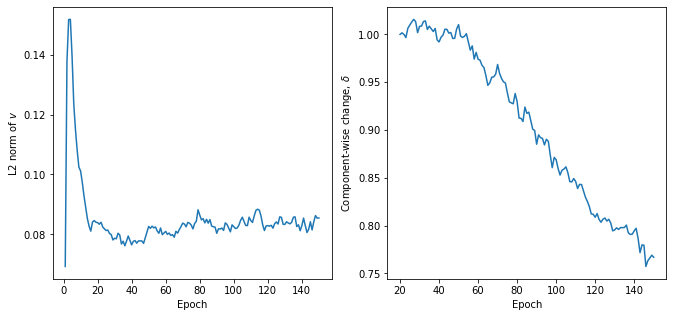

In [167]:
# plot together
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(6*2-1,5))
ax[0].plot(range(1, 151), norms)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('L2 norm of $v$')
ax[1].plot(range(20, 151), avg_diff[19:])
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Component-wise change, $\delta$')
plt.savefig('norm_and_delta.pdf')

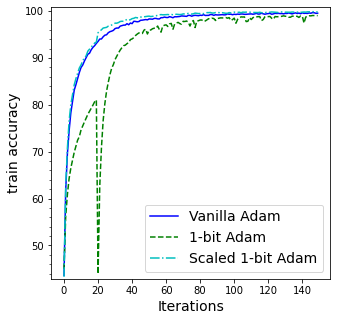

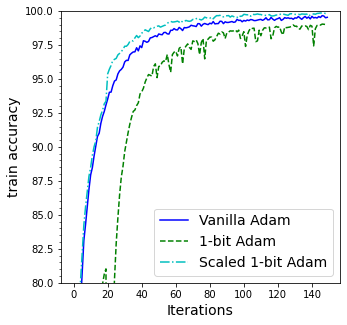

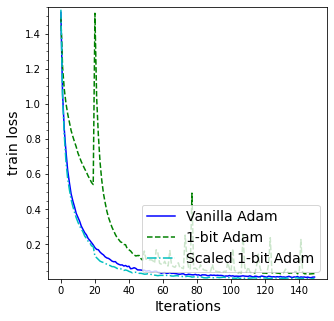

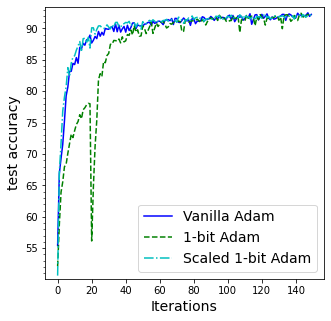

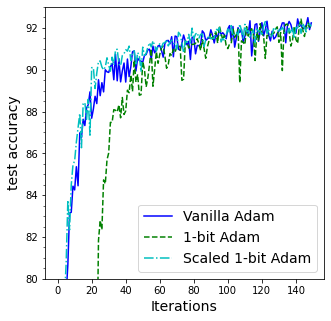

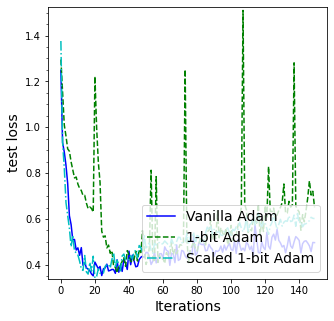

In [182]:
# plot losses and accuracies
from plot_graph import *

exps =  ["Vanilla Adam", '1-bit Adam', 'Scaled 1-bit Adam']


exp({"train accuracy":"train_accuracies"}, exps, "all_train_accuracy_adam")
exp({"train accuracy":"train_accuracies"}, exps, "zoom_all_train_accuracy_adam", yrange=[80.0, 100.0])
exp({"train loss":"train_losses"}, exps, "all_train_loss_adam")
exp({"test accuracy":"test_accuracies"}, exps, "all_test_accuracy_adam")
exp({"test accuracy":"test_accuracies"}, exps, "zoom_all_test_accuracy_adam", yrange=[80.0, 93.0])
exp({"test loss":"test_losses"}, exps, "all_test_loss_adam")